## CAPSTONE PROJECT - CLASSIFICATION

## NPL Credit Scoring
### Disusun oleh: Fikri Irfan Adristi

#### IMPORT PACKAGES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from statsmodels import api
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy import stats
from scipy.optimize import minimize

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Membuat path untuk mengidentifikasi letak directory data
path = '/content/drive/MyDrive/Narasio/Certified Data Scientist/Junior Data Scientist/Capstone Project/Data'

#### READ DATASET

In [4]:
# Load data
df_train = pd.read_csv(os.path.join(path, "npl_credit_scoring_train.csv"), encoding='utf-8')
df_train.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,92,5,5972272,6000000.0,5068230.0,0.0,0.0,5206434.0,NaN,12.19,0.00,7.84,43.92,0,0,9.916667,0.0,1041286.8,0.867739,0.000000,0.059401,0.041536,0.919164,0.919635
1,316,2,136453,65000000.0,128750.0,0.0,0.0,0.0,NaN,100.00,0.00,74.92,100.36,0,0,3.500000,0.0,0.0,0.000000,0.000000,0.023722,0.013271,0.022847,0.007724
2,624,1,1354080,3000000.0,1369203.0,0.0,15000.0,0.0,NaN,100.00,0.00,82.01,0.00,3,0,8.500000,15000.0,0.0,0.000000,0.005000,0.145833,0.000000,0.627426,0.899309
3,628,2,1076660,49000000.0,752108.0,0.0,775440.0,0.0,NaN,99.07,0.00,29.72,57.32,0,0,4.333333,775440.0,0.0,0.000000,0.015825,0.017617,0.177094,0.013699,0.255363
4,947,3,42281368,34000000.0,43130581.0,0.0,0.0,41144841.0,NaN,0.00,22.63,37.49,43.58,0,1,7.000000,0.0,13714947.0,1.210142,0.000000,0.412361,0.014556,1.205087,1.116092


Dari data diatas maka bisa didapat keterangan bahwa <br>
x = X, jumlah_kartu, outstanding, limit_kredit, tagihan, total_pemakaian_tunai, total_pemakaian_retail, sisa_tagihan_tidak_terbayar, kode_cabang, rasio_pembayaran, persentasi_overlimit, rasio_pembayaran_3bulan, rasio_pembayaran_6bulan, skor_delikuensi, jumlah_tahun_sejak_pembukaan_kredit, total_pemakaian, sisa_tagihan_per_jumlah_kartu, sisa_tagihan_per_limit, total_pemakaian_per_limit, pemakaian_3bln_per_limit, pemakaian_6bln_per_limit, utilisasi_3bulan, utilisasi_6bulan.	 <br>
y = flag_kredit_macet

#### PROBLEM STATEMENT

#### Permasalahan
> Analisa kredit adalah penilaian kelayakan terhadap pengaju kredit. Fungsi analisa kredit diantaranya sebagai dasar bank dalam menentukan diterimanya pengajuan kredit, menentukan tingkat suku bunga kredit jaminan serta jaminan yang disyaratkan untuk dipenuhi nasabah, dan evaluasi. Banyak faktor yang dipertimbangkan analis kredit sebelum memberikan rekomendasi menerima atau menolak sebuah kredit. **Bank A ingin membuat sistem penilaian kelayakan kredit secara otomatis** berdasarkan data yang mereka miliki. Penulis akan melakukan analisis klasifikasi dan melakukan prediksi flag_kredit_macet berdasarkan variabel yang ada.

#### Deskripsi Data
> 1. jumlah kartu: Jumlah kartu aktif yang dimiliki pelanggan.
2. outstanding: Total saldo pemakaian kartu kredit.
3. limit kredit: Jumlah maksimum limit kredit yang dapat digunakan.
4. tagihan: Jumlah tagihan pada akhir bulan.
5. total_pemakaian: Total pemakaian kartu kredit (tunai dan retail) pada bulan terakhir.
6. total_pemakaian tunai: Total pemakaian transaksi tunai pada bulan terakhir *(cash advance)*.
7. total_pemakaian_retail: Total pemakaian transaksi retail pada bulan terakhir.
8. sisa_tagihan_tidak_terbayar: Jumlah tagihan tidak terbayar pada bulan terakhir.
9. rasio_pembayaran: Rasio perbandingan jumlah yang dibayar dengan tagihan pada bulan terakhir.
10. presentasi_overlimit: Presentasi overlimit.
11. nomor_pelanggan: ID pelanggan.
12. utilisasi_3bulan: Utilisasi kartu kredit selama 3 bulan terakhir.
13. pemakaian_3bln_per_limit: Rata-rata pemakaian selama 3 bulan terakhir dibagi total limit.
14. rasio_pembayaran_3bulan: Rata-rata rasio pembayaran 3 bulan terakhir.
15. utilisasi_6bulan: Utilisasi kartu kredit selama 3 bulan sebelum 3 bulan terakhir.
16. pemakaian_6bln_per_limit: Rata-rata pemakaian selama 3 bulan sebelum 3 bulan terakhir dibagi total limit.
17. rasio_pembayaran_6bulan: Rata-rata rasio pembayaran 3 bulan sebelum 3 bulan terakhir.
18. skor_pembayaran: Nilai yang dihitung berdasarkan jumlah minimum pembayaran yang dilakukan pelanggan dalam 6 bulan terakhir.
19. sisa_tagihan_per_jumlah_kartu: Jumlah tagihan yang tidak terbayar pada bulan terakhir dibagi jumlah kartu aktif.
20. sisa_tagihan_per_limit: Jumlah tagihan yang tidak terbayar pada bulan terakhir dibagi total limit.
21. total_pemakaian_per_limit: Total pemakaian kartu kredit (tunai dan retail) pada bulan terakhir dibagi total limit.
22. jumlah_tahun_sejak_pembuatan_kredit: Jumlah kredit sejak pembuatan kartu kredit pertama kali.
23. flag_kredit_macet: Flag yang menandakan apakah kartu kredit macet atau tidak.

#### EDA

In [5]:
# Cek informasi yang terdapat di data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15343 entries, 0 to 15342
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15343 non-null  int64  
 1   jumlah_kartu                         15343 non-null  int64  
 2   outstanding                          15343 non-null  int64  
 3   limit_kredit                         15343 non-null  float64
 4   tagihan                              15343 non-null  float64
 5   total_pemakaian_tunai                15343 non-null  float64
 6   total_pemakaian_retail               15343 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15343 non-null  float64
 8   kode_cabang                          15243 non-null  object 
 9   rasio_pembayaran                     15343 non-null  float64
 10  persentasi_overlimit                 15343 non-null  float64
 11  rasio_pembayaran_3bulan     

Dari info tersebut tidak terdapat missing value.  Selanjutnya akan dicari tahu, apakah nasabah yang memiliki kredit macet lebih banyak dibandingkan yang tidak atau sebaliknya ?

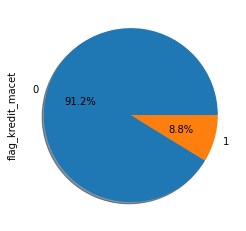

In [6]:
# Mencari perbandingan label/class
df_train['flag_kredit_macet'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Dari pie-chart tersebut, dapat diketahui bahwa nasabah yang memiliki kredit macet lebih sedikit, data ini sangat tidak seimbang. Oleh karena data ini tidak seimbang, maka pemodelan klasifikasi pada *capstone project* ini menggunakan teknik analisis data Regresi Logistik Univariat dengan Estimasi *maximum likelihood* (MLE). Menurut Mayadi [1] Estimasi *maximum likelihood* (MLE) pada regresi logistik dengan data respon sangat tidak seimbang ditentukan dengan mencari nilai maksimum persamaan sebagai berikut:

Estimasi MLE.png

In [7]:
# Analisa deskriptif
df_train.describe()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,15343.000000,15343.000000,1.534300e+04,1.534300e+04,1.534300e+04,1.534300e+04,1.534300e+04,1.534300e+04,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,1.534300e+04,1.534300e+04,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000
mean,7750.138956,2.507332,1.160634e+07,2.081037e+07,8.087595e+06,7.468477e+04,2.032315e+06,8.138304e+06,64.482234,3.347169,50.539467,81.291786,0.004758,0.087597,6.636067,2.107030e+06,2.964641e+06,0.468332,0.109579,0.167506,0.202896,0.571362,0.534084
std,4472.966163,1.014525,2.415412e+07,2.960443e+07,1.766835e+07,6.205923e+05,7.959575e+06,1.925786e+07,797.324307,9.257389,1333.723881,1472.735798,0.114362,0.282717,4.682317,8.125462e+06,6.262742e+06,0.473221,0.200651,0.192300,0.275018,0.412303,0.432826
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.000000,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3875.500000,2.000000,1.997592e+06,5.000000e+06,8.150830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.200000,21.600000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035000,0.032900,0.189000,0.155000
50%,7752.000000,2.000000,4.724856e+06,9.000000e+06,3.141692e+06,0.000000e+00,2.010420e+05,2.750772e+06,26.900000,0.000000,50.000000,65.600000,0.000000,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335929,0.022100,0.108000,0.117000,0.576000,0.496000
75%,11624.500000,3.000000,1.061836e+07,2.200000e+07,7.420343e+06,0.000000e+00,1.403758e+06,7.139904e+06,100.000000,1.070000,91.335000,100.000000,0.000000,0.000000,9.330000,1.513168e+06,3.083416e+06,0.930000,0.128000,0.239424,0.285000,0.917000,0.864000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.000000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


Interpretasi: 
*   Dari variabel flag_kredit_macet, memiliki nilai rata-rata sebesar 0.087597 dan nilai standar deviasi sebesar 0.282717.
*   Sedangkan pada variabel jumlah_kartu, kartu kredit paling banyak dimiliki oleh satu nasaban adalah 16 kartu, dan rata-rata kartu kredit yang dimiliki oleh nasabah pada sampel yang dianalisis adalah 2.507332 (dibulatkan 2) kartu.

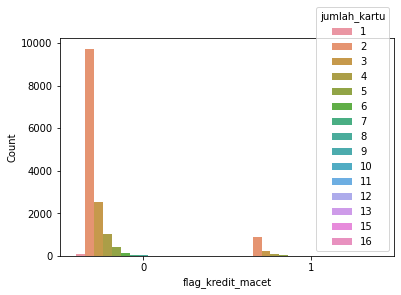

In [8]:
# Buat Crosstab antara flag_kredit_macet dengan jumlah_kartu
jumlah_kartu_flag_kredit_macet = pd.crosstab(df_train['flag_kredit_macet'], (df_train['jumlah_kartu']))

# Buat hasil crosstab menjadi dataframe
stacked = jumlah_kartu_flag_kredit_macet.stack().reset_index().rename(columns={0:'Count'})
sns.barplot(x=stacked.flag_kredit_macet, y=stacked.Count, hue=stacked.jumlah_kartu)
plt.show()

Jika dilihat dari barplot crosstab tersebut, tidak ada perbedaan yang signifikan secara rasio, antara jumlah kartu kredit nasabah dengan kelompok 0 (nasabah yang kreditnya lancar) dan kelompok 1 (nasabah yang kreditnya macet), meskipun jumlah data sampel *unbalanced*.

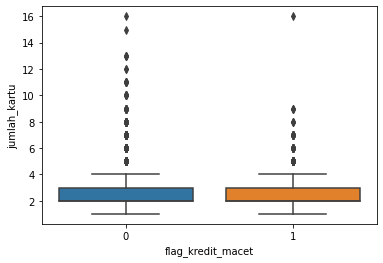

In [9]:
# Boxplot jumlah_kartu dengan flag_kredit_macet
sns.boxplot(x="flag_kredit_macet", y="jumlah_kartu", data=df_train)

Jika dilihat dari boxplot tersebut, juga tidak ada perbedaan yang signifikan secara rasio, antara jumlah kartu kredit nasabah dengan kelompok 0 (nasabah yang kreditnya lancar) dan kelompok 1 (nasabah yang kreditnya macet), meskipun pada kelompok 0 lebih banyak memiliki data yang *outlier*.

#### DATA PRE-PROCESSING

*Missing value*

In [10]:
# Mengecek berapa jumlah null value pada masing masing kolom. 
jumlah_missing = pd.isnull(df_train).sum()
jumlah_missing

X                                        0
jumlah_kartu                             0
outstanding                              0
limit_kredit                             0
tagihan                                  0
total_pemakaian_tunai                    0
total_pemakaian_retail                   0
sisa_tagihan_tidak_terbayar              0
kode_cabang                            100
rasio_pembayaran                         0
persentasi_overlimit                     0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
skor_delikuensi                          0
flag_kredit_macet                        0
jumlah_tahun_sejak_pembukaan_kredit      0
total_pemakaian                          0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
total_pemakaian_per_limit                0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
utilisasi_3bulan                         0
utilisasi_6

In [11]:
# menghitung ratio missing value pada metrics masing masing kolom. 
rasio = jumlah_missing.div(len(df_train))
rasio

X                                      0.000000
jumlah_kartu                           0.000000
outstanding                            0.000000
limit_kredit                           0.000000
tagihan                                0.000000
total_pemakaian_tunai                  0.000000
total_pemakaian_retail                 0.000000
sisa_tagihan_tidak_terbayar            0.000000
kode_cabang                            0.006518
rasio_pembayaran                       0.000000
persentasi_overlimit                   0.000000
rasio_pembayaran_3bulan                0.000000
rasio_pembayaran_6bulan                0.000000
skor_delikuensi                        0.000000
flag_kredit_macet                      0.000000
jumlah_tahun_sejak_pembukaan_kredit    0.000000
total_pemakaian                        0.000000
sisa_tagihan_per_jumlah_kartu          0.000000
sisa_tagihan_per_limit                 0.000000
total_pemakaian_per_limit              0.000000
pemakaian_3bln_per_limit               0

Kolom kode_cabang memiliki jumlah missing value hingga 0,65% sehingga, *missing value* pada kolom kode_cabang lebih baik tidak dihilangkan (drop) dari table.

Cek Data *Duplicate*

In [12]:
# Cek data duplicate dari dataframe
df_train[df_train.duplicated(keep=False)]

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan


Tidak ada data yang terduplikasi dalam sampel ini

Cek Korelasi

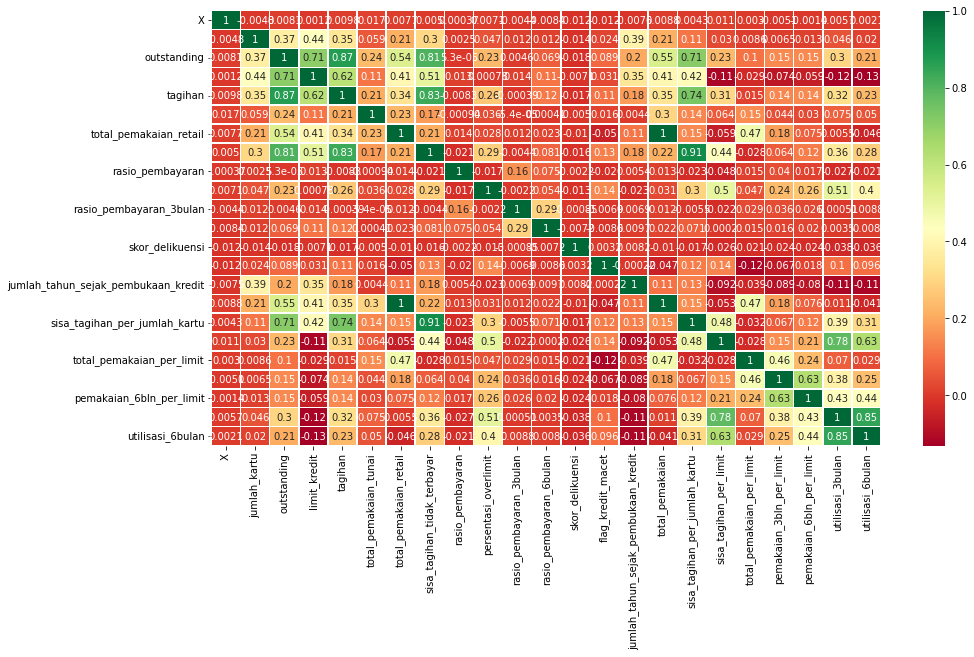

In [13]:
# Melakukan perhitungan nilai korelasi dengan mengasumsikan data adalah data interval.
sns.heatmap(df_train.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [14]:
# Cek urutan korelasi terendah ke tertinggi
korelasi = df_train.corr()["flag_kredit_macet"].sort_values()
korelasi

total_pemakaian_per_limit             -0.116207
pemakaian_3bln_per_limit              -0.067138
total_pemakaian_retail                -0.049683
total_pemakaian                       -0.047419
rasio_pembayaran                      -0.020056
X                                     -0.012438
rasio_pembayaran_6bulan               -0.008569
rasio_pembayaran_3bulan               -0.006857
jumlah_tahun_sejak_pembukaan_kredit   -0.000222
skor_delikuensi                        0.003236
total_pemakaian_tunai                  0.016374
pemakaian_6bln_per_limit               0.018036
jumlah_kartu                           0.023667
limit_kredit                           0.030994
outstanding                            0.089344
utilisasi_6bulan                       0.096429
utilisasi_3bulan                       0.103251
tagihan                                0.107561
sisa_tagihan_per_jumlah_kartu          0.122347
sisa_tagihan_tidak_terbayar            0.129020
sisa_tagihan_per_limit                 0

Dari *output* diatas dapat diketahui bahwa variabel flag_kredit_macet memiliki korelasi yang rendah dengan variabel jumlah_kartu yaitu dengan nilai sebesar 0,023667.

#### FEATURE ENGINEERING

Data pada variabel  flag_kredit_macet tidak seimbang, maka pemodelan klasifikasi pada capstone project ini menggunakan teknik analisis data Regresi Logistik Univariat dengan Estimasi maximum likelihood (MLE) sesuai dengan saran Mayadi [1]. Oleh sebab itu, penulis perlu melakukan *feature selection*. Menurut admin [2] *feature selection* adalah Adalah proses memilih subset (yang relevant terhadap problem) dari set features yang ada, tanpa melakukan transformasi. *Feature selection* dilakukan menggunakan definisi operasional variabel sebagai berikut:

*   flag_kredit_macet sebagai variabel dependen (Y, 0 = Kredit Lancar dan 1 = Kredit Macet).
*   jumlah_kartu sebagai variabel independen (X). 

Pada capstone project ini tidak dilakukan penambahan variabel baru, karena teknik analisis data yang digunakan adalah Regresi Logistik Univariat dengan Estimasi *maximum likelihood* (MLE).



In [15]:
# Mendefinisikan variabel dependen dan variabel independen
y_train = df_train['flag_kredit_macet']
x_train = df_train['jumlah_kartu']

#### MODELING

In [16]:
# Membuat dataframe train regression
df_train_regression = pd.DataFrame({'x_train':x_train, 'y_train':y_train})
df_train_regression.head()

,x_train,y_train
0,5,0
1,2,0
2,1,0
3,2,0
4,3,1


Stats Model (*Logistic Regression* dengan metode *Maximum Likelihood*)

Modul rujukan dapat diakses di: https://www.statsmodels.org/dev/discretemod.html [3]

In [17]:
# Melakukan estimasi Logit Regression dengan metode Maximum Likelihood
model = sm.Logit(y_train, x_train)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.325261
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      flag_kredit_macet   No. Observations:                15343
Model:                          Logit   Df Residuals:                    15342
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Feb 2022   Pseudo R-squ.:                -0.09537
Time:                        06:16:42   Log-Likelihood:                -4990.5
converged:                       True   LL-Null:                       -4556.0
Covariance Type:            nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
jumlah_kartu    -0.9334      0.012    -77.160      0.000      -0.957      -0.910


Dari hasil pemodelan tersebut, jika menggunakan taraf signifikansi 5%, maka variabel jumlah_kartu berpengaruh signifikan terhadap flag_kredit_macet. Karena 1 adalah "Yes" pada flag_kredit_macet, maka dia digunakan sebagai referensi atau kelas negatif. Tanda coef menunjukkan arah hubungan variabel tersebut. Ilustrasinya adalah, semakin besar jumlah_kartu, maka kecenderungan untuk flag_kredit_macet semakin bertambah.

In [18]:
# Nilai Koefisien Logit Regression dengan metode Maximum Likelihood
result.params

jumlah_kartu   -0.9334
dtype: float64

Nilai coef jumlah_kartu adalah -0.9334 artinya, jika nilai jumlah_kartu bertambah 1 maka nilai flag_kredit_macet bertambah 0.9334.

In [19]:
# odds ratio
round(np.exp(result.params), 3)

jumlah_kartu    0.393
dtype: float64

Nilai odds ratio digunakan untuk mengetahui besarnya hubungan. Untuk nasabah yang kreditnya macet mempunyai kecenderungan untuk flag_kredit_macet sebesar 0.393 kali lipat dibanding nasabah yang kreditnya lancar. 

Prediksi Model

In [20]:
prediction = result.predict(x_train)

In [21]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x_train: 1 if x_train > 0.5 else 0)
pred_results['actual'] = y_train
pred_results.head()

,logreg_pred,prediksi,actual
0,0.009313,0,0
1,0.133912,0,0
2,0.282235,0,0
3,0.133912,0,0
4,0.057313,0,1


#### EVALUATION

In [22]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.912
Test precision =  0.000
Test recall =  0.000
Test f-score =  0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pada *data train*, akurasi *testing* mendapatkan nilai yang sangat tinggi yaitu 0,912; dengan presisi sebesar 0,000; recall 0,000; dan f-score 0,000. Nilai presisi, recall dan f-score sebesar 0.000 dikarenakan data yang tidak seimbang. Tetapi secara keseluruhan model sudah cukup baik.

### LOAD AND PREDICT NEW DATA

In [23]:
# Load data
df_test = pd.read_csv(os.path.join(path, "npl_credit_scoring_test.csv"), encoding='utf-8')
df_test.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,6188,2,5025000,5000000.0,833333.0,900000.0,538002.0,3290742.0,F,100.0,0.00,100.0,150.0,0,6.75,1438002.0,1645371.0,0.658,0.288,0.0322,6.600000e-08,1.0200,1.2000
1,4783,2,509019,3000000.0,258000.0,0.0,418000.0,0.0,A,0.0,0.00,24.5,0.0,0,5.42,418000.0,0.0,0.000,0.139,0.0695,0.000000e+00,0.0897,0.0592
2,13414,2,5153766,5000000.0,5007495.0,0.0,5019950.0,5515204.0,F,0.0,9.88,75.2,10.0,0,7.67,5019950.0,2757602.0,1.100,1.000,0.4390,3.550000e-01,0.6740,0.3630
3,11819,3,29214412,35000000.0,28509908.0,0.0,4148000.0,29214022.0,A,0.0,0.00,15.0,30.2,0,13.70,4148000.0,9738007.0,0.835,0.119,0.0833,3.620000e-02,0.7920,0.7430
4,7416,2,40929,3000000.0,40100.0,0.0,0.0,0.0,B,0.0,0.00,0.0,0.0,0,6.42,0.0,0.0,0.000,0.000,0.0000,0.000000e+00,0.0107,0.0000


In [24]:
# Mendefinisikan variabel dependen dan variabel independen
y_train = df_train['flag_kredit_macet']
x_test = df_test['jumlah_kartu']

# Membuat dataframe test regression
df_test_regression = pd.DataFrame({'x_test':x_test, 'y_train':y_train})
df_test_regression.head()

,x_test,y_train
0,2.0,0
1,2.0,0
2,2.0,0
3,3.0,0
4,2.0,1


In [25]:
prediction = result.predict(x_test)

In [26]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x_test: 1 if x_test > 0.5 else 0)
pred_results['actual'] = y_train
pred_results.head()

,logreg_pred,prediksi,actual
0,0.133912,0,0
1,0.133912,0,0
2,0.133912,0,0
3,0.057313,0,0
4,0.133912,0,1


In [27]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.940
Test precision =  0.000
Test recall =  0.000
Test f-score =  0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pada data test, akurasi *testing* mendapatkan nilai yang sangat tinggi yaitu 0,940; dengan presisi sebesar 0,000; recall 0,000; dan f-score 0,000. Nilai presisi, recall dan f-score sebesar 0.000 dikarenakan data yang tidak seimbang. Tetapi secara keseluruhan model sudah cukup baik. Akurasi model pada *data train* dan *data test* juga sudah optimal *(sweet spot)* karena perbedaan skor akurasi antar kedua data tersebut hanya sebesar 0,028 (didapatkan dari 0,940-0,912).

### KESIMPULAN/SARAN

Dari *capstone project classification* ini, penulis menyimpulkan beberapa hal, yaitu:

* Hasil analisis *logit regression* dengan metode *maximum likelihood* menunjukkan variabel jumlah_kartu berpengaruh signifikan terhadap flag_kredit_macet (Prob. 0,000 < *a* 0,05) dengan koefisien beta sebesar -0.9334. Ilustrasinya adalah, semakin besar jumlah_kartu, maka kecenderungan untuk flag_kredit_macet semakin bertambah.
* Hasil analisis *odds ratio* menunjukkan untuk nasabah yang kreditnya macet mempunyai kecenderungan untuk flag_kredit_macet sebesar 0.393 kali lipat dibanding nasabah yang kreditnya lancar.
* Akurasi model pada *data train* dan *data test* juga sudah optimal *(sweet spot)* karena perbedaan skor akurasi antar kedua data tersebut hanya sebesar 0,028 (didapatkan dari 0,940-0,912). Sehingga, secara keseluruhan model sudah cukup baik.

Adapun saran yang dapat diberikan kepada pihak manajemen Bank A agar menaikkan tingkat bunga untuk nasabah yang memiliki jumlah kartu kredit yang banyak.



### DAFTAR PUSTAKA

[1]	S. Mayadi, “Regresi Logistik Univariat,” J. Educ., vol. 4, no. 2, hal. 119–135, 2009, doi: /10.29408/edc.v4i2.48.

[2]	Admin, “Pengenalan Feature Engineering,” SkillPlus: Free Indonesian Tutorial, 2020. https://skillplus.web.id/pengenalan-feature-engineering/ (diakses Feb 01, 2022).

[3]	J. Perktold, S. Seabold, dan J. Taylor, “Regression with Discrete Dependent Variable,” statsmodels, 2022. https://www.statsmodels.org/dev/discretemod.html (diakses Jan 31, 2022).

